In [1]:
from langgraph.graph import StateGraph, START,END
from typing import TypedDict
from langchain_community.llms import ollama
from langchain_community.chat_models import ChatOllama
from langchain_core.output_parsers import PydanticOutputParser
from langchain_core.prompts import PromptTemplate
from langchain.chains import LLMChain
from pydantic import BaseModel, Field


# define state 

In [3]:
class structurestate(BaseModel):
    essay:str =Field(description='It will be text.')
    feedback:str =Field(description='summary of essay in text.')
    score:int =Field(description='score out of 100',ge=0,le=100)


# define graph

In [4]:
graph=StateGraph(structurestate)

In [2]:
llm_model=ChatOllama(model='llama3')

C:\Users\Ashish\AppData\Local\Temp\ipykernel_19184\2969955315.py:1: LangChainDeprecationWarning: The class `ChatOllama` was deprecated in LangChain 0.3.1 and will be removed in 1.0.0. An updated version of the class exists in the :class:`~langchain-ollama package and should be used instead. To use it run `pip install -U :class:`~langchain-ollama` and import as `from :class:`~langchain_ollama import ChatOllama``.
  llm_model=ChatOllama(model='llama3')


In [16]:
def read_essay(state:structurestate)->structurestate:
    with open("essay.txt","r",encoding="utf-8") as f:
        essay_test=f.read()
    #state['essay']=essay_test# if state Dict
    state.essay=essay_test
    return state

In [8]:
def SummariseWithLLM(state:structurestate)->structurestate:
    pass

# define node

In [9]:
graph.add_node("read_essay",read_essay)
graph.add_node("SummariseWithLLM",SummariseWithLLM)

In [10]:
graph.add_edge(START,'read_essay')
graph.add_edge('read_essay','SummariseWithLLM')
graph.add_edge('SummariseWithLLM',END)

In [11]:
Workflow=graph.compile()

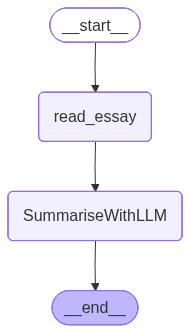

In [12]:
Workflow